Reconhecimento de Padrões

Lista 6: K-Means e PCA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
import os
from IPython.display import Image, display

# Quake Dataset + K-means

In [3]:
class Kmeans():
    def __init__(self, *args, **kwargs):
        pass

    def kmeans(self, X, K, max_iter=20, plot=False):
        centroids = self.centroid_init(X, K)
        best_centroids = centroids
        best_reconstruction_error = float('inf')

        for i in range(max_iter):

            distances = np.sqrt(
                ((X[:, np.newaxis, :] - centroids) ** 2).sum(axis=2))
            labels = np.argmin(distances, axis=1)

            new_centroids = []
            for k in range(K):
                cluster_points = X[labels == k]
                if len(cluster_points) > 0:
                    new_centroid = cluster_points.mean(axis=0)
                else:
                    new_centroid = centroids[k]
                new_centroids.append(new_centroid)

            new_centroids = np.array(new_centroids)
            reconstruction_error = np.sum((X - new_centroids[labels]) ** 2)

            if plot == True:
                title = f"K {K} - Iteration {i + 1}"
                self.plot_clusters(X, labels, new_centroids,
                                   title, output_dir='images/kmeans')

            centroids = new_centroids
            if reconstruction_error < best_reconstruction_error:
                best_reconstruction_error = reconstruction_error
                best_centroids = new_centroids

        db_score = davies_bouldin_score(X, labels)
        print(f'K: {K}, DB: {db_score:.4f}')

        return labels, best_centroids, db_score, best_reconstruction_error

    def centroid_init(self, X, K):
        density = []
        for i, point in enumerate(X):
            dist = np.sqrt(((X - point) ** 2).sum(axis=1))
            density.append(np.sum(dist < np.median(dist)))
        density = np.array(density)
        centroids_indices = density.argsort()[-K:]
        return X[centroids_indices]

    def plot_clusters(self, X, labels, centroids, title, output_dir=None):
        plt.figure(figsize=(8, 6))
        for k in range(len(centroids)):
            cluster_points = X[np.where(labels == k)]
            plt.scatter(cluster_points[:, 0],
                        cluster_points[:, 1], label=f'Cluster {k}')
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    color='black', marker='X', s=200, label='Centroids')
        plt.title(title)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()

        if output_dir != None:
            plt.savefig(os.path.join(
                output_dir, f'{title}.png'))
            plt.close()
        else:
            plt.show()

In [4]:
quake = pd.read_csv('content/quake.csv', header=None)

quake_max = quake.max()
quake_min = quake.min()
quake = (quake - quake_min) / (quake_max - quake_min)
data = quake.values

quake.head()

,0,1
0,0.098382,0.578564
1,0.774475,0.919241
2,0.749032,0.896600
3,0.661504,0.892071
4,0.309942,0.971691


In [5]:
max_clusters = 20
best_db_score = float("inf")
best_k = None
best_labels = None
best_centroids = None
best_reconstruction_error = None

for K in range(4, max_clusters + 1):
    labels, centroids, db_score, rec_error = Kmeans().kmeans(
        data, K, max_iter=20, plot=False)
    if db_score < best_db_score:
        best_db_score = db_score
        best_k = K
        best_labels = labels
        best_centroids = centroids
        best_reconstruction_error = rec_error

K: 4, DB: 0.6614
K: 5, DB: 0.8224
K: 6, DB: 0.6390
K: 7, DB: 0.6174
K: 8, DB: 0.7882
K: 9, DB: 0.7403
K: 10, DB: 0.6278
K: 11, DB: 0.6000
K: 12, DB: 0.6388
K: 13, DB: 0.6608
K: 14, DB: 0.6995
K: 15, DB: 0.6556
K: 16, DB: 0.6475
K: 17, DB: 0.6839
K: 18, DB: 0.6470
K: 19, DB: 0.6852
K: 20, DB: 0.6898


Best K: 11
Best DB score: 0.6000


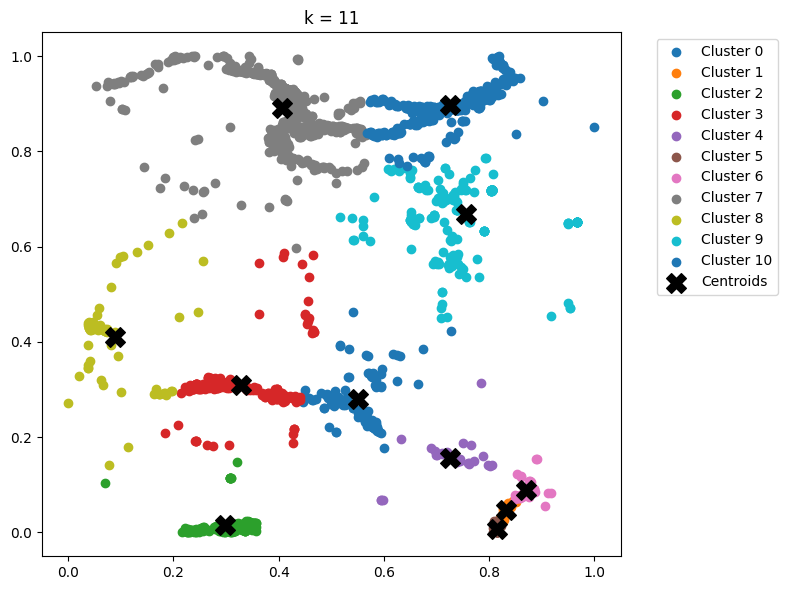

In [6]:
print(f"Best K: {best_k}")
print(f"Best DB score: {best_db_score:.4f}")

Kmeans().plot_clusters(data, best_labels, best_centroids, f'k = {best_k}')

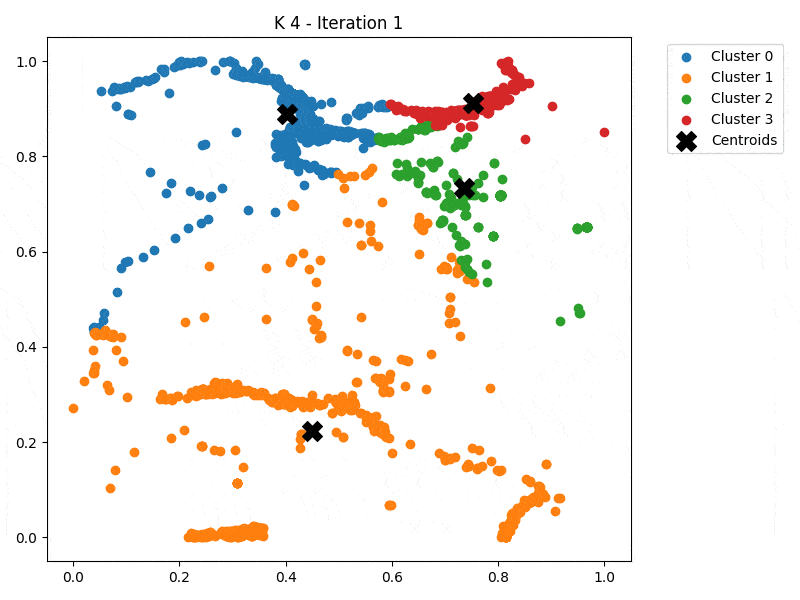

In [8]:
display(Image(filename='images/gifs/kmeans.gif', format='gif'))

# Penguins Dataset + PCA

In [9]:
def pca(X, n_components):
    X_centered = X - np.mean(X, axis=0)

    covariance_matrix = np.cov(X_centered, rowvar=False)

    values, vectors = np.linalg.eigh(covariance_matrix)

    sorted_indices = np.flip(np.argsort(values))
    values = values[sorted_indices]
    vectors = vectors[:, sorted_indices]

    selected_vectors = []
    for i in range(n_components):
        selected_vectors.append(vectors[:, i])
    selected_vectors = np.array(selected_vectors).T

    X_reduced = np.dot(X_centered, selected_vectors)

    total_variance = np.sum(values)
    explained_variance = values / total_variance

    return X_reduced, explained_variance[:n_components]

def plot_pca(X_reduced, labels, title="Projeção PCA"):
    unique_labels = np.unique(labels)
    plt.figure(figsize=(8, 6))
    for label in unique_labels:
        points = X_reduced[labels == label]
        plt.scatter(points[:, 0], points[:, 1], label=f'Classe {label}')
    plt.title(title)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.grid()
    plt.show()

In [11]:
penguins = pd.read_csv("content/penguins.csv", header=None)
y = penguins.iloc[:, -1].values

penguins_max = penguins.max()
penguins_min = penguins.min()
penguins = (penguins - penguins_min) / (penguins_max - penguins_min)

X = penguins.iloc[:, :-1].values

print(set(y))
penguins.head()

{np.float64(0.0), np.float64(1.0), np.float64(2.0)}


,0,1,2,3,4
0,0.254545,0.666667,0.152542,0.291667,0.0
1,0.269091,0.511905,0.237288,0.305556,0.0
2,0.298182,0.583333,0.389831,0.152778,0.0
3,0.167273,0.738095,0.355932,0.208333,0.0
4,0.261818,0.892857,0.305085,0.263889,0.0


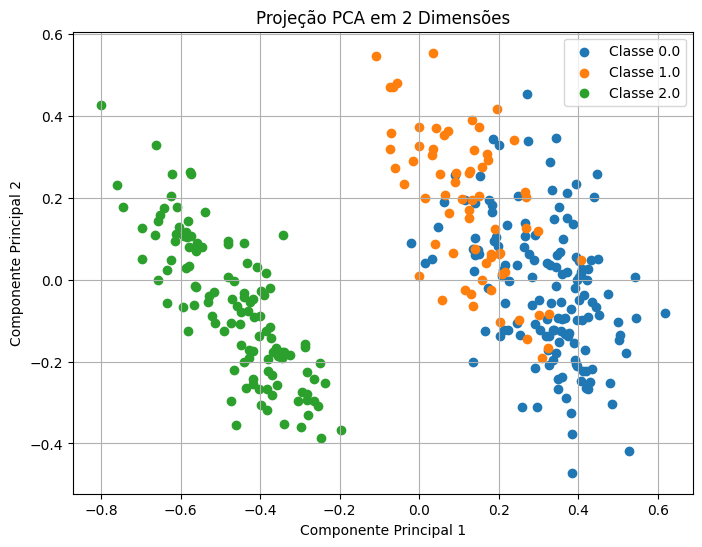

Variância explicada (2 dimensões): 0.8879


In [12]:
X_reduced_2d, explained_variance_2d = pca(X, n_components=2)
plot_pca(X_reduced_2d, y, title="Projeção PCA em 2 Dimensões")
print(f"Variância explicada (2 dimensões): {explained_variance_2d.sum():.4f}")

In [14]:
for n in range(1, 5):
  _, explained_variance = pca(X, n_components=n)
  print(f"Dimensão {n}: Variância acumulada = {explained_variance.sum():.4f}")

Dimensão 1: Variância acumulada = 0.6963
Dimensão 2: Variância acumulada = 0.8879
Dimensão 3: Variância acumulada = 0.9713
Dimensão 4: Variância acumulada = 1.0000
